<a href="https://colab.research.google.com/github/iqballmhtrm/Pembelajaran-Mesin/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Iqbal Muhtaram

Absen : 18

Kelas : TI-3G

---
## UTS Machine Learning

In [5]:
# Import Library
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage.feature import hog
from skimage.color import rgb2gray
from PIL import Image
from sklearn.preprocessing import StandardScaler
# Import necessary modules
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#penjelasan #
Library ini diimpor untuk berbagai tujuan, seperti akses file (OS), pemrosesan gambar (PIL, skimage), ekstraksi fitur (hog), normalisasi data (StandardScaler), algoritma clustering (DBSCAN), dan visualisasi (matplotlib).

Silhouette Score tidak dapat dihitung karena hanya ada satu cluster.


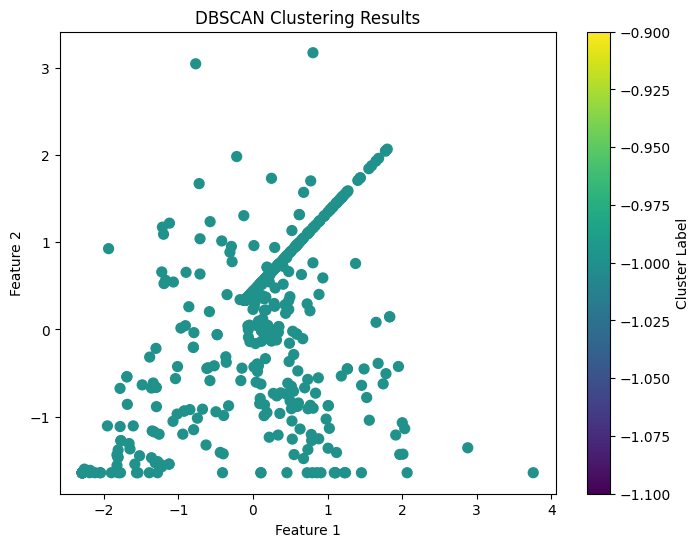

In [3]:
import os
import random
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Path ke folder gambar
image_folder = '/content/drive/MyDrive/Humans'

# Ambil semua nama file gambar
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg", ".bmp", ".gif"))]

random.seed(42)
selected_files = random.sample(image_files, min(500, len(image_files)))

# Fungsi untuk ekstraksi fitur dengan HOG
def extract_features_with_hog(image_path):
    try:
        img = Image.open(image_path).convert("RGBA")
        img = img.resize((128, 128))
        img_array = np.array(img)

        # Konversi ke grayscale
        img_gray = rgb2gray(img_array[:, :, :3])

        # Ekstraksi fitur HOG
        hog_features = hog(img_gray, orientations=8, pixels_per_cell=(16, 16),
                           cells_per_block=(1, 1), visualize=False)
        return hog_features
    except Exception as e:
        print(f"Error memproses {image_path}: {e}")
        return None

# Ekstrak fitur dari semua gambar terpilih
features = [extract_features_with_hog(os.path.join(image_folder, img)) for img in selected_files]
features = [f for f in features if f is not None]

# Validasi jumlah fitur
if len(features) == 0:
    raise ValueError("Tidak ada gambar yang berhasil diproses.")

# Konversi ke array NumPy
features = np.array(features)

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Atur eps dan min_samples sesuai kebutuhan
dbscan_labels = dbscan.fit_predict(features_scaled)

# Hitung Silhouette Score untuk DBSCAN (hanya jika ada lebih dari 1 cluster)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(features_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN Clustering: {silhouette_dbscan:.2f}')
else:
    print("Silhouette Score tidak dapat dihitung karena hanya ada satu cluster.")

# Visualisasi hasil DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


#penjelasan#

1. **Impor Library**: Untuk akses file, pemrosesan gambar, clustering, dan visualisasi.
2. **Ambil File Gambar**: Ambil hingga 500 gambar secara acak dari folder.
3. **Ekstraksi Fitur HOG**: Ambil pola dari tiap gambar dengan HOG.
4. **Normalisasi Fitur**: Sesuaikan skala data agar lebih seragam.
5. **Clustering DBSCAN**: Kelompokkan gambar berdasarkan kemiripan pola.
6. **Silhouette Score**: Ukur kualitas cluster jika lebih dari satu terbentuk.
7. **Visualisasi**: Tampilkan cluster hasil DBSCAN dalam grafik.

### Interpretasi
- **Cluster yang Terbentuk**: Visualisasi dan Silhouette Score menunjukkan seberapa jelas dan akurat data terbagi dalam kelompok.
- **Silhouette Score**: Jika tinggi, clustering berhasil baik; jika rendah, perlu penyesuaian parameter.

Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.61      0.47      0.53        49
           1       0.58      0.71      0.64        51

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.58       100
weighted avg       0.59      0.59      0.58       100



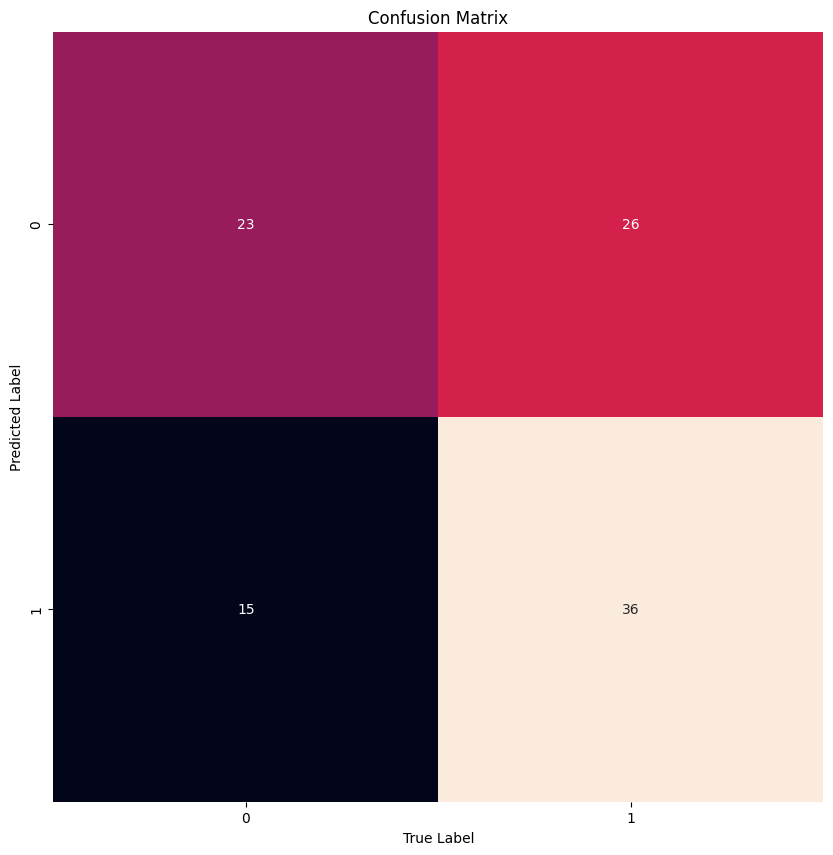

Accuracy on Train: 97.00%
Accuracy on Test: 59.00%


In [6]:
# Path ke folder gambar
image_folder = '/content/drive/MyDrive/Humans'

# Ambil semua nama file gambar
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg", ".bmp", ".gif"))]

random.seed(42)
selected_files = random.sample(image_files, min(500, len(image_files)))

# Fungsi untuk ekstraksi fitur dengan HOG
def extract_features_with_hog(image_path):
    try:
        img = Image.open(image_path).convert("RGBA")
        img = img.resize((128, 128))
        img_array = np.array(img)

        # Konversi ke grayscale
        img_gray = rgb2gray(img_array[:, :, :3])

        # Ekstraksi fitur HOG
        hog_features = hog(img_gray, orientations=8, pixels_per_cell=(16, 16),
                           cells_per_block=(1, 1), visualize=False)
        return hog_features
    except Exception as e:
        print(f"Error memproses {image_path}: {e}")
        return None

# Ekstrak fitur dari semua gambar terpilih
features = [extract_features_with_hog(os.path.join(image_folder, img)) for img in selected_files]
features = [f for f in features if f is not None]

# Validasi jumlah fitur
if len(features) == 0:
    raise ValueError("Tidak ada gambar yang berhasil diproses.")

# Konversi ke array NumPy
features = np.array(features)

# Normalisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Buat label (misalnya, 2 kelas: 0 dan 1)
labels = [random.randint(0, 1) for _ in range(len(features))]  # Sesuaikan dengan dataset Anda

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Model SVM menggunakan ekstraksi HOG
model2 = SVC(kernel='linear', C=50, gamma='scale')
model2.fit(X_train, y_train)

# Evaluasi model untuk training
y_train_predict2 = model2.predict(X_train)
acc_train2 = accuracy_score(y_train, y_train_predict2)

# Evaluasi model untuk testing
y_test_predict2 = model2.predict(X_test)
acc_test2 = accuracy_score(y_test, y_test_predict2)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test, y_test_predict2))

# Bentuk confusion matrix
mat2 = confusion_matrix(y_test, y_test_predict2)

plt.figure(figsize=(12, 10))
sns.heatmap(mat2, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(labels),
            yticklabels=np.unique(labels))
plt.title("Confusion Matrix"), plt.xlabel('True Label'), plt.ylabel('Predicted Label')
plt.show()

print(f'Accuracy on Train: {acc_train2:.2%}')
print(f'Accuracy on Test: {acc_test2:.2%}')



penjelasan:

1. **Persiapan Data**: Ambil hingga 500 gambar acak dari folder.
2. **Ekstraksi Fitur HOG**: Ubah gambar ke grayscale dan ekstrak fitur tekstur.
3. **Normalisasi**: Standarisasi data agar skala fitur seragam.
4. **Label dan Split Data**: Buat label acak (0,1) dan bagi data untuk training/testing.
5. **Model SVM**: Latih model SVM untuk klasifikasi.
6. **Evaluasi Akurasi**: Hitung akurasi model pada data training dan testing.
7. **Confusion Matrix**: Visualisasi hasil prediksi untuk melihat kesalahan dan akurasi per kelas.

### Interpretasi
- **Akurasi**: Tingginya akurasi menunjukkan model dapat membedakan kelas dengan baik.
- **Confusion Matrix**: Menunjukkan prediksi benar dan salah per kelas, membantu menganalisis performa klasifikasi.

In [7]:
pip install keras tensorflow


#penjelasan#                                                           
menginstal TensorFlow beserta Keras sebagai library untuk deep learning.

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Misalkan kita memiliki label yang sesuai untuk setiap gambar.
# Sebagai contoh, kita bisa memiliki dua kelas: 0 dan 1
# Anda perlu menyiapkan label yang sesuai berdasarkan data Anda
labels = np.random.randint(0, 2, size=len(features))  # Contoh label acak (0 dan 1), sesuaikan ini dengan data Anda

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Membangun model ANN
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(labels)), activation='softmax'))  # Sesuaikan dengan jumlah kelas Anda

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluasi model
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Confusion Matrix dan Classification Report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4728 - loss: 1.0045 - val_accuracy: 0.5375 - val_loss: 0.7940
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8302 - loss: 0.4337 - val_accuracy: 0.5000 - val_loss: 0.8204
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9530 - loss: 0.2690 - val_accuracy: 0.4625 - val_loss: 0.8817
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9651 - loss: 0.1975 - val_accuracy: 0.4875 - val_loss: 0.9177
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9739 - loss: 0.1472 - val_accuracy: 0.4500 - val_loss: 0.9455
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9758 - loss: 0.1122 - val_accuracy: 0.4625 - val_loss: 0.9793
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9690 - loss: 0.0967 - val_accuracy: 0.4625 - val_loss: 1.0337
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9717 - loss: 0.0763 - val_accuracy: 0.4375 - v

#penjelasan#

1. **Impor Library**: Mengimpor modul yang diperlukan untuk membangun model dan evaluasi.
   
2. **Persiapan Label**: Membuat label acak (0 dan 1) untuk fitur. Gantilah ini dengan label yang sesuai.

3. **Split Data**: Memisahkan data menjadi data pelatihan (80%) dan pengujian (20%).

4. **Bangun Model ANN**:
   - Membangun model dengan dua lapisan tersembunyi (128 dan 64 neuron) dan satu lapisan output dengan softmax.

5. **Kompilasi Model**: Menggunakan optimizer Adam dan fungsi kehilangan sparse categorical crossentropy.

6. **Melatih Model**: Melatih model selama 50 epoch dengan ukuran batch 32 dan validasi 20%.

7. **Evaluasi Model**: Menghitung prediksi model untuk data pengujian.

8. **Matriks Kebingungan dan Laporan Klasifikasi**: Menghitung dan menampilkan matriks kebingungan serta metrik evaluasi untuk analisis performa model.

### Interpretasi Hasil
- **Matriks Kebingungan**: Menunjukkan prediksi benar dan salah per kelas.
- **Laporan Klasifikasi**: Menyediakan metrik evaluasi model seperti precision dan recall. Hasil yang baik menunjukkan model yang efektif.